In [118]:
import squarify
import pywaffle as Waffle

#### Gestion des polices / intégration de aua pro

In [119]:
from matplotlib import font_manager, rcParams
import matplotlib.pyplot as plt

# Add the paths to your regular and bold font files
font_regular_path = "/home/tlecae/atlas_poles/fonts/AauxProOTW01-Regular.ttf"
font_bold_path = "/home/tlecae/atlas_poles/fonts/AauxProOTW01-Bold.ttf"

# Register both fonts
font_manager.fontManager.addfont(font_regular_path)
font_manager.fontManager.addfont(font_bold_path)

# Set default font family to your company's regular font
plt.rcParams['font.family'] = 'auat'  # Replace with your font name

# Extract font names from the files (if needed, you can set them directly)
font_regular_name = font_manager.FontProperties(fname=font_regular_path).get_name()
font_bold_name = font_manager.FontProperties(fname=font_bold_path).get_name()

# Set global font configurations
rcParams['font.family'] = font_regular_name
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 16  # Bold font size for titles
rcParams['axes.titlepad'] = 10  # Optional padding for better alignment
rcParams['axes.labelsize'] = 12  # Regular font size for axis labels
rcParams['axes.labelweight'] = 'regular'  # Set to regular weight for axis labels
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10


#### Diagramme en barre - Évolution de la population

NOM DU TERRITOIRE :  Territoire Sud


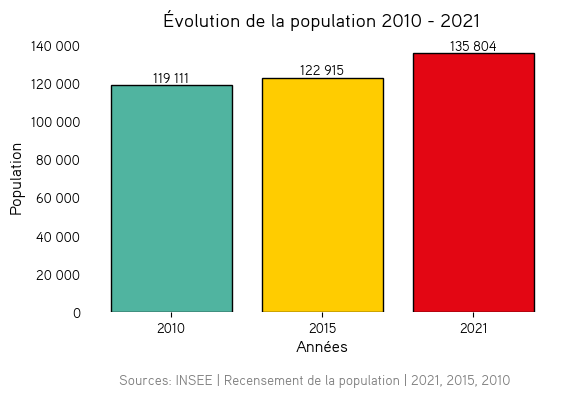

NOM DU TERRITOIRE :  Territoire Nord


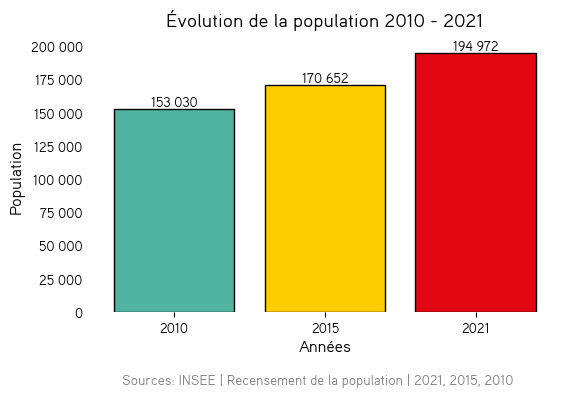

NOM DU TERRITOIRE :  Territoire Est


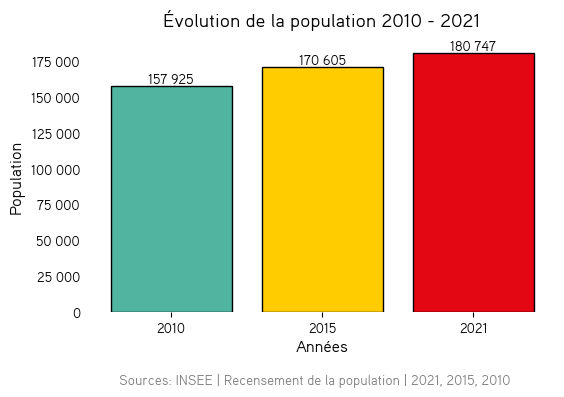

NOM DU TERRITOIRE :  Territoire Centre


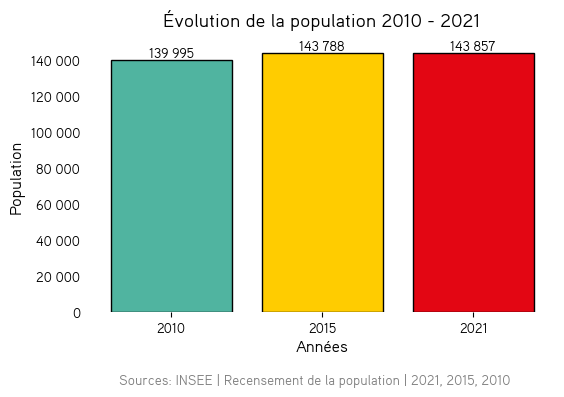

NOM DU TERRITOIRE :  Territoire Ouest


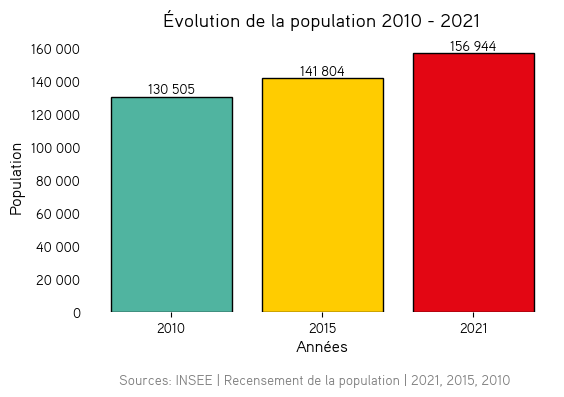

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Data
data = {
    "nom": ["Territoire Sud", "Territoire Nord", "Territoire Est", "Territoire Centre", "Territoire Ouest"],
    "p10_pop": [119111, 153030, 157925, 139995, 130505],
    "p15_pop": [122915, 170652, 170605, 143788, 141804],
    "p21_pop": [135804, 194972, 180747, 143857, 156944]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function for formatting y-axis labels with spaces as thousand separators
def format_with_spaces(x, _):
    return f"{x:,.0f}".replace(",", " ")

# Create bar charts
for index, row in df.iterrows():
    # Create figure and axis
    plt.figure(figsize=(6, 4))
    
    # Bar data
    years = ['2010', '2015', '2021']
    values = [row['p10_pop'], row['p15_pop'], row['p21_pop']]
    
    # Plot bar chart
    bars = plt.bar(years, values, color=['#50B4A0', '#FFCC00', '#E30613'], edgecolor='black')
    
    # Add data labels
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 f"{value:,.0f}".replace(",", " "), ha='center', va='bottom', fontsize=10)
    
    # Title and labels
    plt.title(f"Évolution de la population 2010 - 2021", fontsize=14)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Population", fontsize=12)
    
    # Apply custom formatter to the y-axis
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_spaces))
    
    # Remove frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(left=False)  # Remove y-axis ticks
    
    # Adjust layout to add space for the source text
    plt.subplots_adjust(bottom=0.2)  # Add space at the bottom of the figure
    
    # Add source text below the plot
    plt.figtext(0.5, 0.02, 'Sources: INSEE | Recensement de la population | 2021, 2015, 2010', 
                ha='center', fontsize=10, color='gray')
    
    # Save chart as SVG
    plt.savefig(f"{row['nom'].replace(' ', '_')}_population_evolution.svg", format='svg')  # Save as SVG
    print( 'NOM DU TERRITOIRE : ', row['nom'])
    plt.show()  # Show chart
    plt.close(fig)


#### Baromètres | Horizontal | indice de jeunesse

FileNotFoundError: [Errno 2] No such file or directory: 'T:\\Observation-évaluation\\Portrait_territoires_TM\\sig\\traitements\\output_maquette\\plots_demo/Territoire_Sud_ind_jeun_plot.svg'

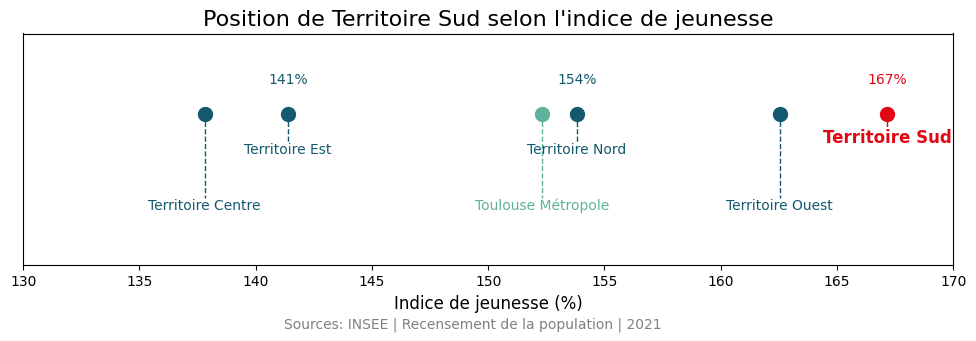

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the updated dataset with new values
data = pd.DataFrame({
    "nom": [
        "Territoire Sud", "Territoire Nord", "Territoire Est",
        "Territoire Centre", "Territoire Ouest", "Toulouse Métropole"
    ],
    "ratio": [167.16, 153.81, 141.39, 137.8, 162.53, 152.32]
})

# Sort data by 'ratio' in descending order
sorted_data = data.sort_values(by="ratio", ascending=False)

# Extract names and ratios for plotting
names = sorted_data["nom"].tolist()
ratios = sorted_data["ratio"].tolist()

# Define output directory
output_dir = r"T:\Observation-évaluation\Portrait_territoires_TM\sig\traitements\output_maquette\plots_demo"
# Convert to WSL-compatible path
wsl_output_dir = output_dir.replace('T:', '/mnt/t').replace('\\', '/')

# Now use the WSL-compatible path
os.makedirs(wsl_output_dir, exist_ok=True)

# Create individual plots for each territory
for i, (name, ratio) in enumerate(zip(names, ratios)):
    # Create a single horizontal bar
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.barh([0], 130, color='#ffffff', height=0.05)

    # Check if the territory is "TM" to assign a unique color
    color = '#60b29c' if name == "TM" else '#E30613' if 130 <= ratio <= 170 else '#14596F'

    # Plot the concerned territory's ratio
    ax.plot(ratio, 0, 'o', markersize=10, color=color)
    ax.text(ratio, -0.005, name, ha='center', va='top', fontsize=12, fontweight='bold', color=color)

    # Dashed line for the highlighted territory
    ax.plot([ratio, ratio], [0, -0.005], color=color, linestyle='--', linewidth=1)
    ax.plot([ratio, ratio], [0, -0.05], color='#e3061500', linestyle='--', linewidth=1)

    # Add the ratio label (data point)
    ax.text(ratio, 0.01, f'{ratio:.0f}%', ha='center', va='bottom', fontsize=10, color=color)

    # Plot other territories
    for j, (other_name, other_ratio) in enumerate(zip(names, ratios)):
        if other_name != name and 130 <= other_ratio <= 170:
            other_color = '#14596F' if other_name != "Toulouse Métropole" else '#60b29c'
            ax.plot(other_ratio, 0, 'o', markersize=10, color=other_color)
            label_height = -0.01 if j % 2 == 0 else -0.03
            ax.text(other_ratio, label_height, other_name, ha='center', va='top', fontsize=10, color=other_color)
            ax.plot([other_ratio, other_ratio], [0, label_height], color=other_color, linestyle='--', linewidth=1)
            if j % 2 == 0:
                ax.text(other_ratio, 0.01, f'{other_ratio:.0f}%', ha='center', va='bottom', fontsize=10, color=other_color)

    # Set x-axis limits
    ax.set_xlim(130, 170)

    # Remove the y-axis tick and label
    ax.set_yticks([])
    ax.set_ylabel('')

    # Label x-axis and title
    ax.set_xlabel("Indice de jeunesse (%)", fontsize=12)
    ax.set_title(f"Position de {name} selon l'indice de jeunesse", fontsize=16)

    # Add caption below the plot
    fig.text(0.5, -0.1, 'Sources: INSEE | Recensement de la population | 2021', ha='center', fontsize=10, color='gray')
    ax.grid(False)
    # Save the figure to the specified directory
    fig.savefig(os.path.join(output_dir, f"{name.replace(' ', '_')}_ind_jeun_plot.svg"), bbox_inches='tight')
    plt.show()

    plt.close(fig)  # Close the figure after saving to avoid displaying it in the loop

#### Baromètres | Vertical | indice de jeunesse

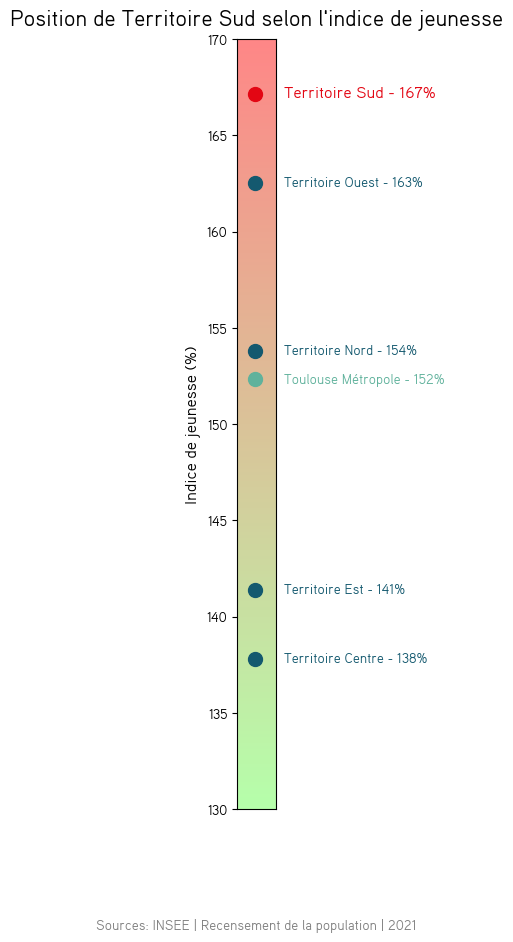

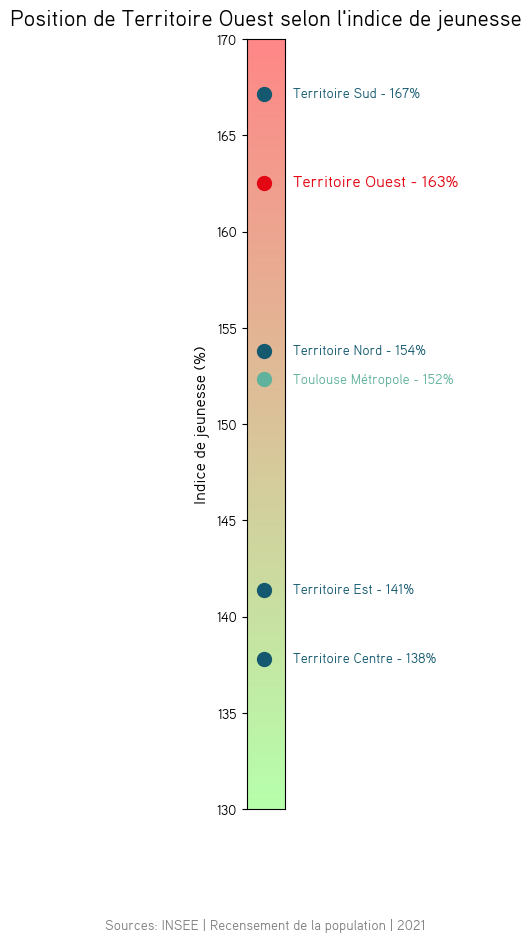

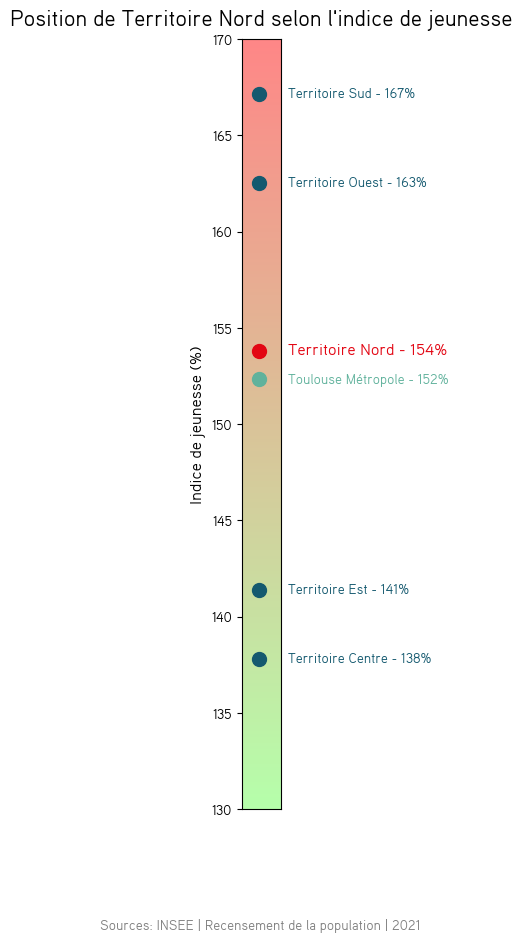

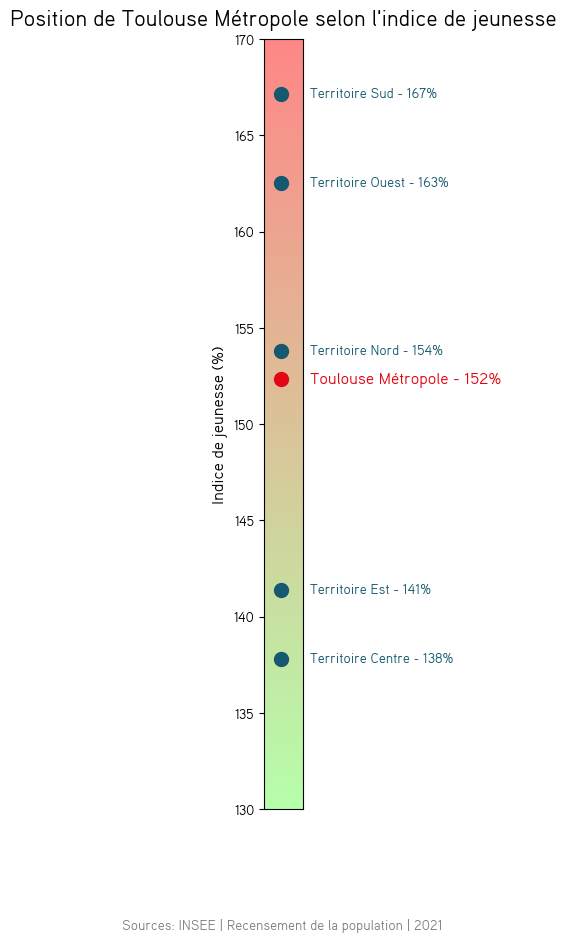

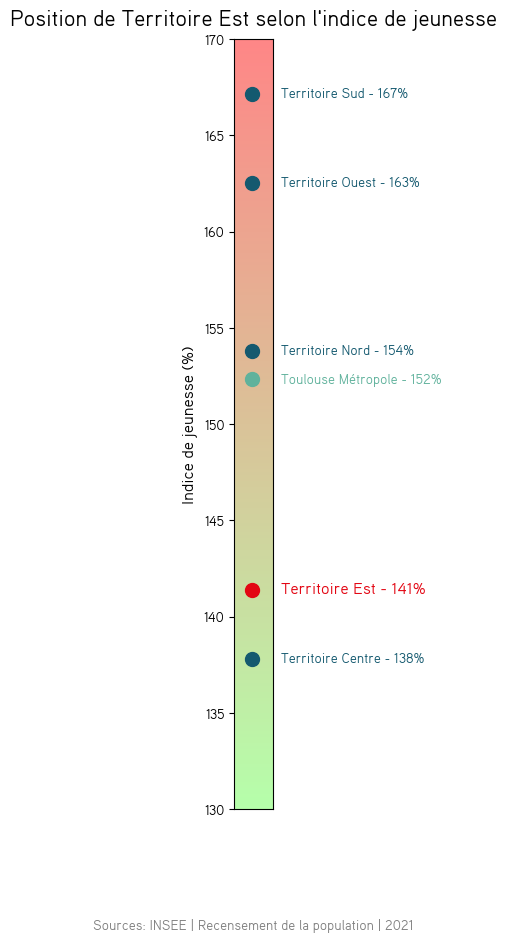

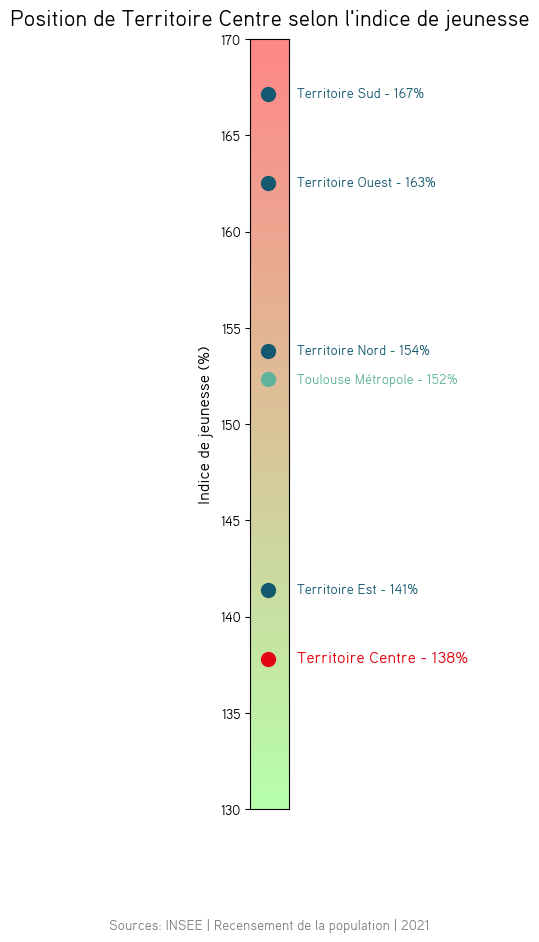

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.colors as mcolors

# Load the updated dataset with new values
data = pd.DataFrame({
    "nom": [
        "Territoire Sud", "Territoire Nord", "Territoire Est",
        "Territoire Centre", "Territoire Ouest", "Toulouse Métropole"
    ],
    "ratio": [167.16, 153.81, 141.39, 137.8, 162.53, 152.32]
})

# Sort data by 'ratio' in descending order
sorted_data = data.sort_values(by="ratio", ascending=False)

# Extract names and ratios for plotting
names = sorted_data["nom"].tolist()
ratios = sorted_data["ratio"].tolist()

# Define output directory
output_dir = "T:\\Observation-évaluation\\Portrait_territoires_TM\\sig\\traitements\\output_maquette\\plots_demo"
os.makedirs(output_dir, exist_ok=True)

# Create individual plots for each territory
for i, (name, ratio) in enumerate(zip(names, ratios)):
    # Dimensionnement plus haut que bas
    fig, ax = plt.subplots(figsize=(0.5, 10))

    # Generate a vertical gradient as background along the y-axis
    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#B6FFAB', '#FF8787'])
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=(0, 1, 130, 170), origin='lower')

    # Check if the territory is "TM" to assign a unique color
    color = '#60b29c' if name == "TM" else '#E30613' if 130 <= ratio <= 170 else '#14596F'

    # Plot the concerned territory's ratio point on the y-axis, positioned closer to the axis
    ax.plot(0.45, ratio, 'o', markersize=10, color=color)
    # LABELS
    # Add the label with the name and ratio next to the point, closer to the y-axis
    ax.text(1.2, ratio, f'{name} - {ratio:.0f}%', ha='left', va='center', fontsize=12, fontweight='bold', color=color)

    # Plot other territories
    for j, (other_name, other_ratio) in enumerate(zip(names, ratios)):
        if other_name != name and 130 <= other_ratio <= 170:
            other_color = '#14596F' if other_name != "Toulouse Métropole" else '#60b29c'
            ax.plot(0.45, other_ratio, 'o', markersize=10, color=other_color)
            # LABELS
            ax.text(1.2, other_ratio, f'{other_name} - {other_ratio:.0f}%', ha='left', va='center', fontsize=10, color=other_color)

    # Set y-axis limits and remove the x-axis tick and label
    ax.set_ylim(130, 170)
    ax.set_xticks([])
    ax.set_ylabel("Indice de jeunesse (%)", fontsize=12)

    # Title
    ax.set_title(f"Position de {name} selon l'indice de jeunesse", fontsize=16)

    # Add caption below the plot
    fig.text(0.5, -0.01, 'Sources: INSEE | Recensement de la population | 2021', ha='center', fontsize=10, color='gray')
    ax.grid(False)
    # Save the figure to the specified directory
    fig.savefig(os.path.join(output_dir, f"{name.replace(' ', '_')}_ind_jeun_plot.svg"), bbox_inches='tight')
    plt.show()

    plt.close(fig)  # Close the figure after saving to avoid displaying it in the loop
    


#### Pyramide des âges (unisexe)

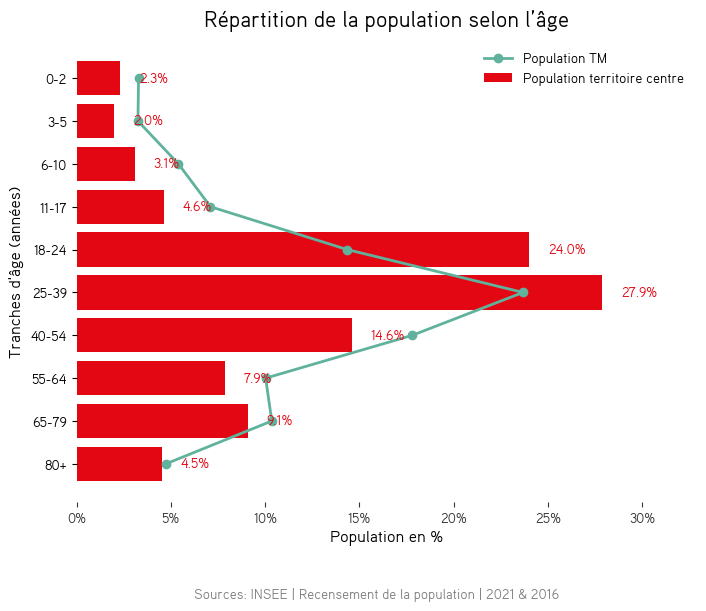

In [123]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# Vos données pour la pyramide des âges
data = {
    "age_group": [
        "0-2", "3-5", "6-10", "11-17", "18-24", "25-39",
        "40-54", "55-64", "65-79", "80+"
    ],
    "population": [
        3324, 2854, 4427, 6654, 34553,
        40127, 21005, 11322, 13069, 6524
    ]
}

# Deuxième dataset pour la comparaison avec TM
comparison_data = {
    "age_group": [
        "0-2", "3-5", "6-10", "11-17", "18-24", "25-39",
        "40-54", "55-64", "65-79", "80+"
    ],
    "comparison_population": [
        26887, 26609, 44173, 58113, 117495,
        193839, 145800, 82067, 84733, 38770
    ]
}
output_dir = "T:\\Observation-évaluation\\Portrait_territoires_TM\\sig\\traitements\\output_maquette\\plots_demo"

df = pd.DataFrame(data)
comparison_df = pd.DataFrame(comparison_data)

# Calculer les pourcentages
df['population_pct'] = df['population'] / df['population'].sum() * 100
comparison_df['comparison_population_pct'] = comparison_df['comparison_population'] / comparison_df['comparison_population'].sum() * 100

# Configuration de la figure
fig, ax = plt.subplots(figsize=(8, 6))

# Tracé des barres en pourcentages
bars = ax.barh(df['age_group'], df['population_pct'], color='#E30613', label='Population territoire centre')

# Ajout des étiquettes de données sur les barres (en rouge)
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1,  # Position horizontale ajustée
            bar.get_y() + bar.get_height() / 2,  # Centré verticalement
            f'{width:.1f}%',  # Affiche en pourcentage
            va='center', color='#E30613')  # Couleur rouge pour correspondre à la couleur des barres

# Formateur pour l'axe des x en pourcentage
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Tracé de la ligne de comparaison en pourcentages
ax.plot(comparison_df['comparison_population_pct'], df['age_group'], color='#60b29c', marker='o', label='Population TM', linewidth=2)

# Ajustement des étiquettes et du style
ax.set_xlabel("Population en %")
ax.set_ylabel("Tranches d'âge (années)")
ax.set_title("Répartition de la population selon l’âge")

# Définir les limites de l'axe x pour ajouter de l'espace
ax.set_xlim(0, max(df['population_pct'].max(), comparison_df['comparison_population_pct'].max()) + 5)

# Inversion de l'axe des y pour que les tranches d'âge soient de haut en bas
ax.invert_yaxis()

# Changer la couleur des ticks de l'axe x principal
ax.tick_params(axis='x', colors='#353535')
for tick in ax.get_xticklabels():
    tick.set_color('#353535')

# Suppression du cadre du graphique (axes)
for spine in ax.spines.values():
    spine.set_visible(False)

# Suppression du cadre de la légende
ax.legend(loc='upper right', frameon=False)

# Texte de la source
fig.text(0.5, -0.05, 'Sources: INSEE | Recensement de la population | 2021 & 2016', ha='center', fontsize=10, color='gray')

# Désactiver la grille
ax.grid(False)

# Affichage et sauvegarde
plt.show()
fig.savefig(os.path.join(output_dir, "pyramide_plot_pct.svg"), bbox_inches='tight')
plt.close(fig)

Saving plot to: /mnt/t/Observation-évaluation/Portrait_territoires_TM/sig/traitements/output_maquette/plots_demo/bar_txevol_annuel_Territoire_Nord.svg


PermissionError: [Errno 13] Permission denied: '/mnt/t/Observation-évaluation/Portrait_territoires_TM/sig/traitements/output_maquette/plots_demo/bar_txevol_annuel_Territoire_Nord.svg'

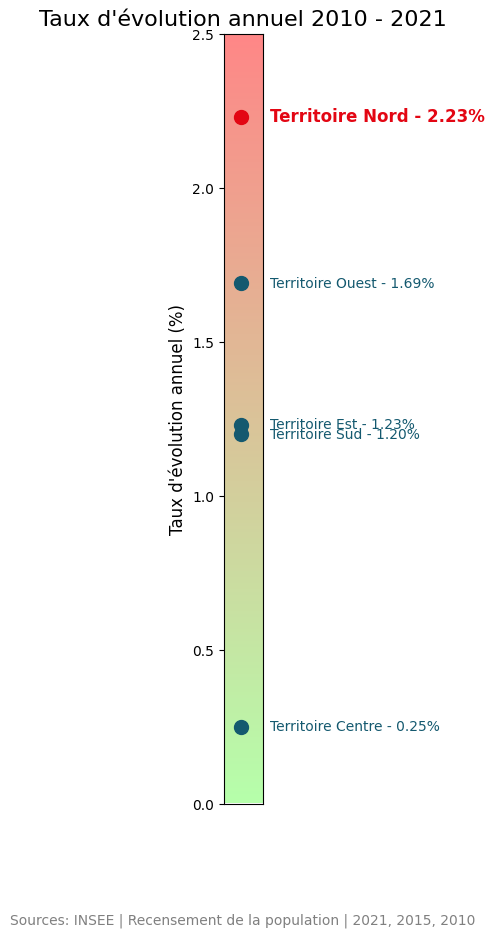

In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# New dataset with annual evolution rates
data = pd.DataFrame({
    "nom": [
        "Territoire Sud", "Territoire Nord", "Territoire Est",
        "Territoire Centre", "Territoire Ouest"
    ],
    "annual_evolution_rate": [1.20, 2.23, 1.23, 0.25, 1.69]
})

# Original Windows path
output_dir = r"T:\Observation-évaluation\Portrait_territoires_TM\sig\traitements\output_maquette\plots_demo"
# Convert to WSL-compatible path
wsl_output_dir = output_dir.replace('T:', '/mnt/t').replace('\\', '/')

# Ensure the directory exists
os.makedirs(wsl_output_dir, exist_ok=True)

# Sort data by 'annual_evolution_rate' in descending order
sorted_data = data.sort_values(by="annual_evolution_rate", ascending=False)

# Extract names and rates for plotting
names = sorted_data["nom"].tolist()
rates = sorted_data["annual_evolution_rate"].tolist()

# Create individual plots for each territory
for i, (name, rate) in enumerate(zip(names, rates)):
    # Create a vertical plot
    fig, ax = plt.subplots(figsize=(0.5, 10))

    # Generate a vertical gradient as background along the y-axis
    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#B6FFAB', '#FF8787'])
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=(0, 1, 0, 2.5), origin='lower')

    # Highlight the current territory in red
    color = '#E30613'

    # Plot the current territory's rate
    ax.plot(0.45, rate, 'o', markersize=10, color=color)
    ax.text(1.2, rate, f'{name} - {rate:.2f}%', ha='left', va='center', fontsize=12, fontweight='bold', color=color)

    # Plot other territories
    for other_name, other_rate in zip(names, rates):
        if other_name != name:
            other_color = '#14596F'
            ax.plot(0.45, other_rate, 'o', markersize=10, color=other_color)
            ax.text(1.2, other_rate, f'{other_name} - {other_rate:.2f}%', ha='left', va='center', fontsize=10, color=other_color)

    # Set y-axis limits and remove x-axis ticks
    ax.set_ylim(0, 2.5)
    ax.set_xticks([])
    ax.set_ylabel("Taux d'évolution annuel (%)", fontsize=12)

    # Title
    ax.set_title(f"Taux d'évolution annuel 2010 - 2021", fontsize=16)

    # Add caption
    fig.text(0.5, -0.01, 'Sources: INSEE | Recensement de la population | 2021, 2015, 2010', ha='center', fontsize=10, color='gray')
    ax.grid(False)

    # Print the file path to ensure it's correct
    file_path = os.path.join(wsl_output_dir, f"bar_txevol_annuel_{name.replace(' ', '_')}.svg")
    print(f"Saving plot to: {file_path}")

    # Save the figure
    fig.savefig(file_path, bbox_inches='tight')
    plt.close(fig)  # Close the figure after saving


In [125]:
# Try saving a text file to check write permissions
test_file_path = os.path.join(output_dir, "test_write_permission.txt")
with open(test_file_path, 'w') as f:
    f.write("Test write permission.")
print(f"Test file saved: {test_file_path}")

Test file saved: T:\Observation-évaluation\Portrait_territoires_TM\sig\traitements\output_maquette\plots_demo/test_write_permission.txt


### Évolution des catégories socio-professionnelles

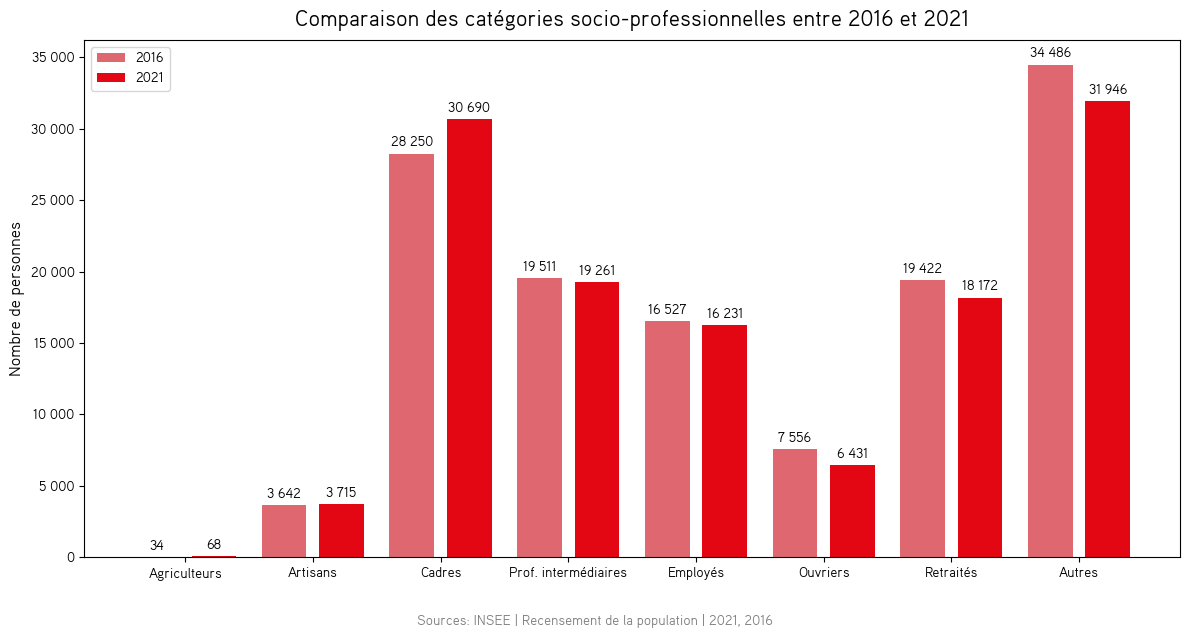

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data
categories = [
    "Agriculteurs", "Artisans", "Cadres", "Prof. intermédiaires",
    "Employés", "Ouvriers", "Retraités", "Autres"
]

values_2016 = [34, 3642, 28250, 19511, 16527, 7556, 19422, 34486]
values_2021 = [68, 3715, 30690, 19261, 16231, 6431, 18172, 31946]

output_dir = "T:\\Observation-évaluation\\Portrait_territoires_TM\\sig\\traitements\\output_maquette\\plots_demo"

# Create an array for the x positions
x = np.arange(len(categories))

# Set the width of the bars and add space between the groups
width = 0.35  # Width of the bars
space_between_groups = 0.1  # Additional space between the two groups of bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2 - space_between_groups/2, values_2016, width, label='2016', color='#df6870')  # Shift left
bars2 = ax.bar(x + width/2 + space_between_groups/2, values_2021, width, label='2021', color='#E30613')  # Shift right

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Nombre de personnes')
ax.set_title('Comparaison des catégories socio-professionnelles entre 2016 et 2021')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding data labels on top of bars with space as thousands separator
def add_data_labels(bars):
    for bar in bars:
        height = bar.get_height()
        # Format the label with space as thousands separator
        formatted_height = f'{height:,.0f}'.replace(',', ' ')
        ax.annotate(formatted_height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_data_labels(bars1)
add_data_labels(bars2)

# Function to format y-axis labels with a space as thousands separator
def format_y_ticks(x, pos):
    return f'{int(x):,}'.replace(',', ' ')

# Set the formatter for the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

fig.text(0.5, -0.05, 'Sources: INSEE | Recensement de la population | 2021, 2016', ha='center', fontsize=10, color='gray')
ax.grid(False)
ax2.grid(False)
fig.savefig(os.path.join(output_dir, f"{name.replace(' ', '_')}_csp_plot.svg"), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()
plt.close(fig)

# --------------------------------------------------- #
### EN dessous ce sont des tests
# --------------------------------------------------- #

In [127]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle,
    title={
        'label': '80% de la population est végétarienne',
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        }
    },
    rows=10,
    values=[80, 20],
    colors=["#60b29c", "#983D3D"],
    icons='person',
    font_size=30
)
plt.close(fig)

/home/tlecae/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AauxProOTW01-Regular.
  fig.canvas.print_figure(bytes_io, **kw)


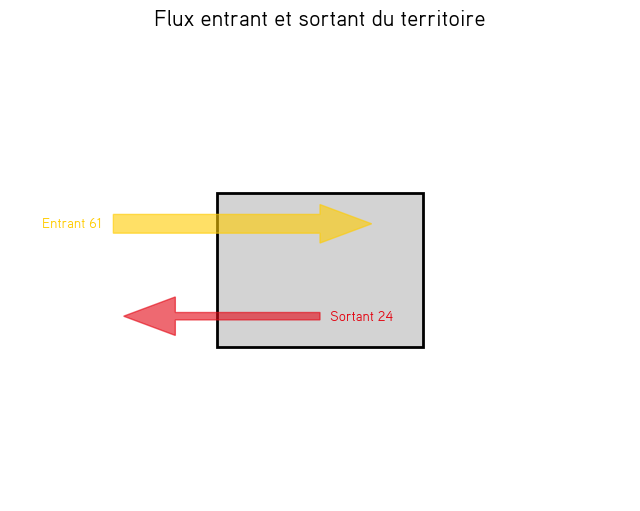

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Generating random data for flow in and out
np.random.seed(42)
flow_in = np.random.randint(10, 100)  # Random flow value for inflow
flow_out = np.random.randint(10, 100)  # Random flow value for outflow

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Draw a square to represent the territory
square_size = 10
square = plt.Rectangle((-square_size/2, -square_size/2), square_size, square_size, linewidth=2, edgecolor='black', facecolor='lightgrey')
ax.add_patch(square)

# Vertical offset for the arrows
offset = 3

# Draw the incoming arrow (pointing towards the square)
ax.arrow(-10, offset, 10, 0, head_width=2.5, head_length=2.5, fc='#ffcc00', ec='#ffcc00', width=flow_in / 50, alpha=0.6)

# Draw the outgoing arrow (pointing away from the square), starting more on the left
ax.arrow(0, -offset, -7, 0, head_width=2.5, head_length=2.5, fc='#E30613', ec='#E30613', width=flow_out / 50, alpha=0.6)

# Add labels to indicate the flow values
ax.text(-12, offset, f'Entrant {flow_in}', color='#ffcc00', ha='center', va='center')
ax.text(2, -offset, f'Sortant {flow_out}', color='#E30613', ha='center', va='center')

# Set limits and remove axes
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.axis('off')

plt.title('Flux entrant et sortant du territoire')

plt.show()
plt.close(fig)


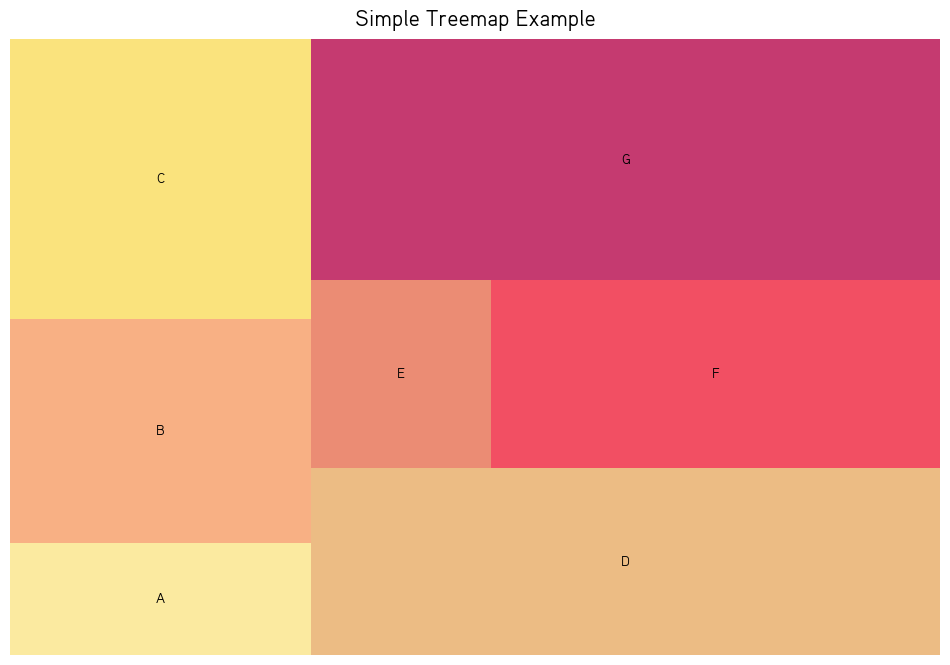

In [129]:

data = {'labels': ["A","B","C","D","E","F","G"],
        'values':[10,20,25,35,10,25,45]}
df = pd.DataFrame(data)

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
# data = data.values
# labels = data.labels

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=data['values'], label=data['labels'], color=colors, alpha=0.8)
plt.axis('off')  # Remove axes for cleaner look
plt.title("Simple Treemap Example")
plt.show()


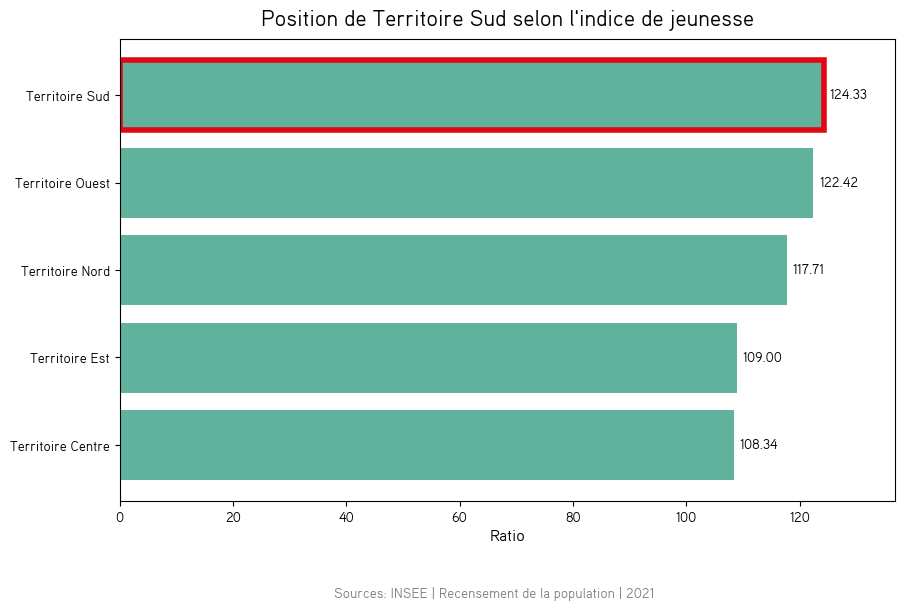

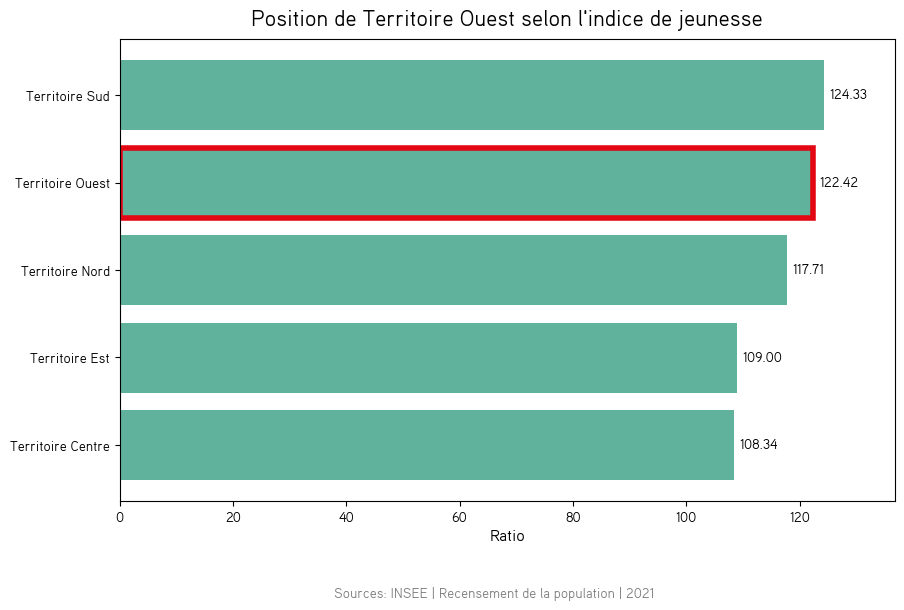

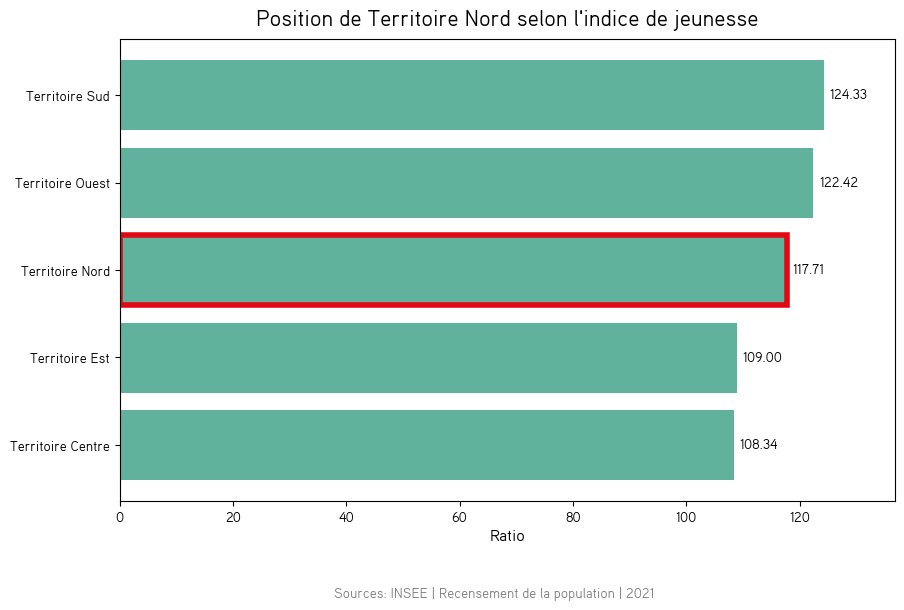

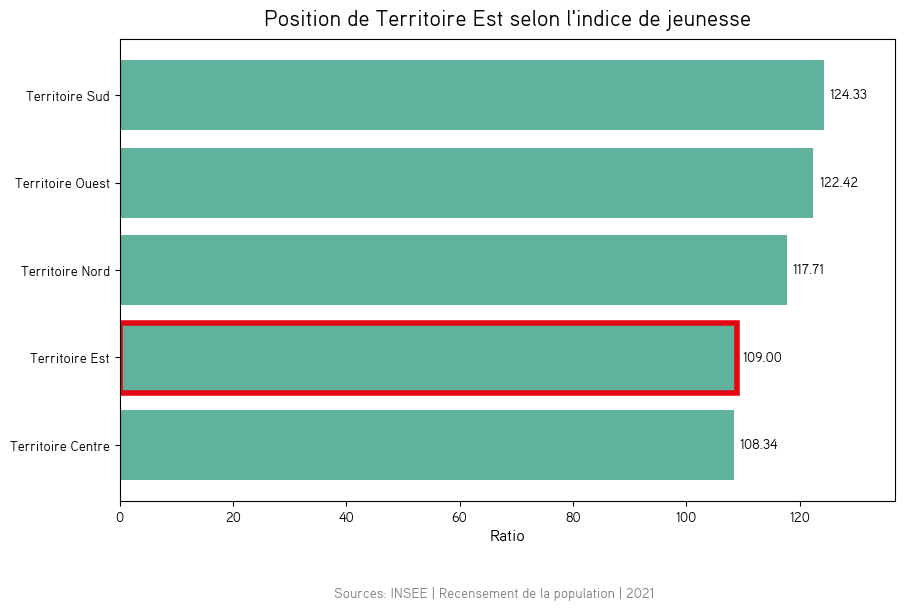

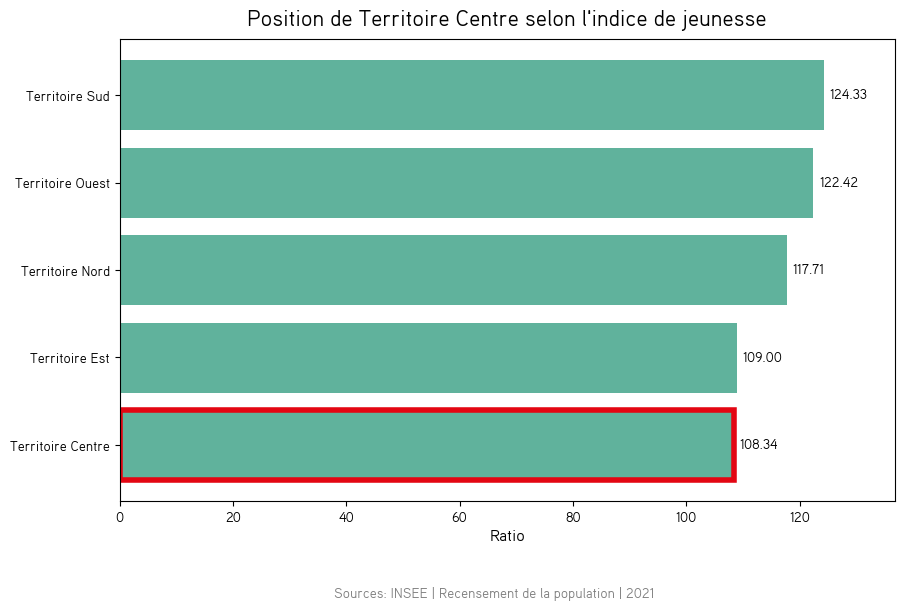

In [130]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os

# Load the dataset
data = pd.DataFrame({
    "nom": ["Territoire Sud", "Territoire Nord", "Territoire Est", "Territoire Centre", "Territoire Ouest"],
    "ratio": [124.33, 117.71, 109.00, 108.34, 122.42]
})

# Sort data by 'ratio' in descending order
sorted_data = data.sort_values(by="ratio", ascending=False)

# Extract names and ratios for plotting
names = sorted_data["nom"].tolist()
ratios = sorted_data["ratio"].tolist()
output_dir = "T:\\Observation-évaluation\\Portrait_territoires_TM\\sig\\traitements\\output_maquette\\plots_demo"

# Loop over each territory to create a separate chart
for _, target in sorted_data.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(names, ratios, color='#60b29c')
    ax.invert_yaxis()  # Highest ratio on top
    ax.set_title(f"Position de {target['nom']} selon l'indice de jeunesse", fontsize=16)
    ax.set_xlabel("Ratio", fontsize=12)

    # Adjust x-axis limit for padding
    ax.set_xlim(0, max(ratios) * 1.1)  # Increase the limit by 10%

    # Highlight the current territory's bar with a black rectangle
    for i, bar in enumerate(bars):
        if names[i] == target["nom"]:
            # Add black box around the bar
            rect = patches.Rectangle(
                (0, bar.get_y()),  # x, y position of the box
                bar.get_width(),  # width of the box (equal to bar's width)
                bar.get_height(),  # height of the box
                linewidth=4, edgecolor='#E30613', facecolor='none'
            )
            ax.add_patch(rect)

    # Adding value labels to bars
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{bar.get_width():.2f}', va='center')

    # Add caption below the plot
    fig.text(0.5, -0.05, 'Sources: INSEE | Recensement de la population | 2021', ha='center', fontsize=10, color='gray')
    ax.grid(False)
    # Save the plot with the correct name
    fig.savefig(os.path.join(output_dir, f"{target['nom'].replace(' ', '_')}_ind_jeun_bis_plot.svg"), bbox_inches='tight')

    # Show plot for each territory
    plt.show()
    plt.close(fig)  # Close the figure after saving to avoid displaying it in the loop
